In [7]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
iris.data.shape

(150, 4)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
from sklearn.model_selection import train_test_split
TrainX, TestX, TrainY, TestY = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
print(TrainX.shape)
print(TrainY.shape)
print(TestX.shape)
print(TestY.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(TrainX, TrainY)
model.theta_

array([[4.99411765, 3.38235294, 1.45294118, 0.23235294],
       [5.921875  , 2.75625   , 4.196875  , 1.30625   ],
       [6.65384615, 2.98717949, 5.5974359 , 2.03076923]])

In [42]:
pred_train = model.predict(TrainX)
# print(pred_train)
# print(TrainY)
pred_test = model.predict(TestX)
score_train = model.predict_proba(TrainX)
score_test = model.predict_proba(TestX)
# print(score_train)
# print(score_test)

In [38]:
from sklearn import metrics
tr_acc = metrics.accuracy_score(TrainY, pred_train)
print('tr ACC : ', tr_acc)

ts_acc = metrics.accuracy_score(TestY, pred_test)
print('ts ACC : ', ts_acc)

tr ACC :  0.9428571428571428
ts ACC :  1.0


In [43]:
tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, score_train[:,1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, score_test[:,1], pos_label=1)

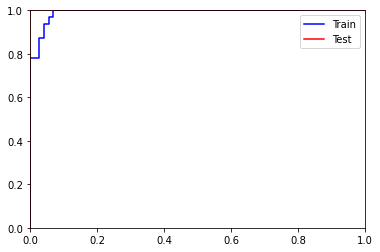

In [45]:
import matplotlib.pyplot as plt
plt.plot(tr_fpr, tr_tpr, color='b', label='Train')
plt.plot(ts_fpr, ts_tpr, color='r', label='Test')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()